# Boosting

На примерах урока мы увидели, что алгоритм XGBoost работает лучше и быстрее относительно GradientBoosting и AdaBoost. Поэтому в этом домашнем задании предлагаем посмотреть, какие еще интересные методы существуют в библиотеке для реализацией этого алгоритма.

### Важность признаков

Признаки, которые используют для обучения модели, оказывают большое влияние на ее качество. Неинформативные или слабо информативные признаки могут существенно понизить эффективность модели.

Отбор признаков – процесс выбора признаков, имеющих наиболее тесные взаимосвязи с целевой переменной. Он позволяет:
- уменьшить переобучение: чем меньше избыточных данных, тем меньше возможностей для модели принимать решения на основе «шума»
- повысить точность: чем меньше противоречивых данных, тем выше точность
- сократить время обучения: чем меньше данных, тем быстрее обучается модель

В библиотеке sckit-learn есть раздел feature_selection, который помогает автоматизировать этот процесс на основе методов статистики, линейной алгебры и некоторых специальных алгоритмов, таких как уже знакомый нам PCA - метод главных компонент.

Некоторые из таких методов реализованы в библиотеках для конкретных алгоритмов, к которым относится и xgboost.

Сгенерируем синтетические данные. 

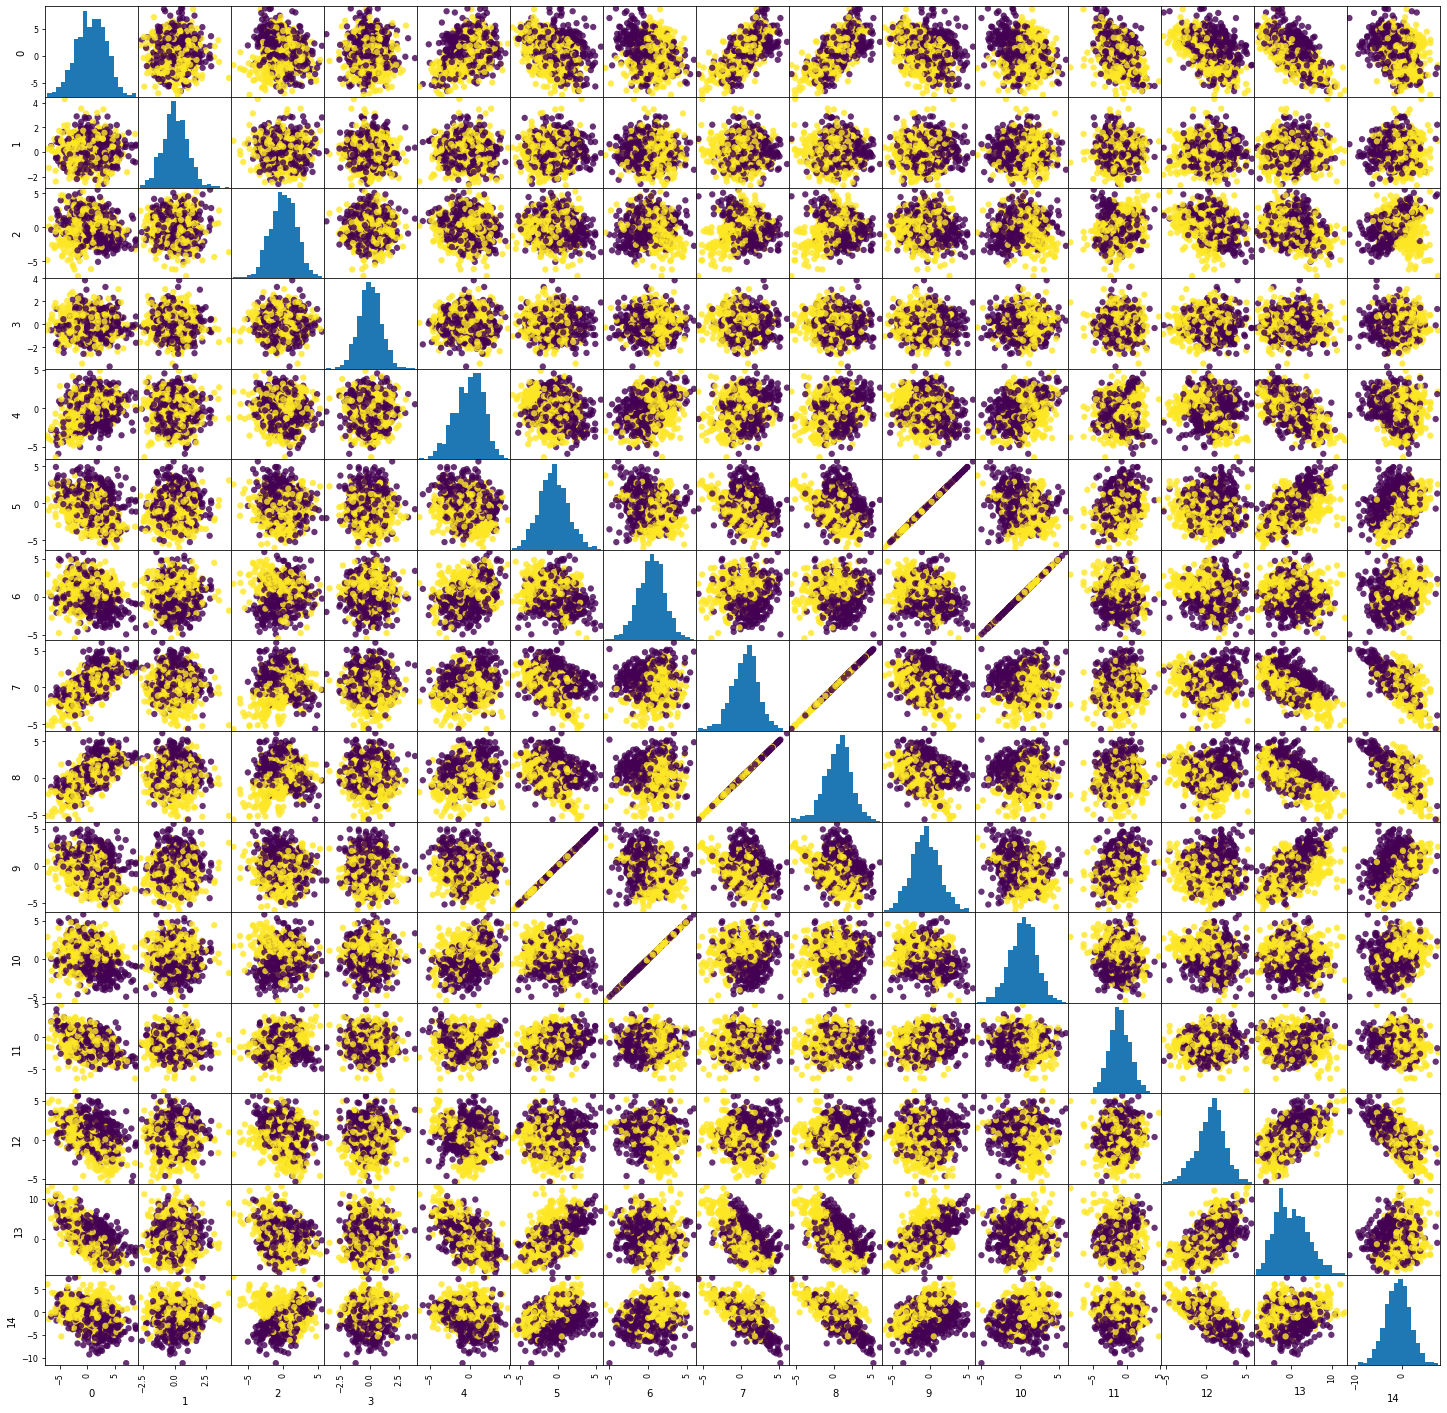

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

x, y = make_classification(n_samples=1000, n_features=15, n_informative=7, 
                           n_redundant=3, n_repeated=3, random_state=17)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

features = pd.DataFrame(x)
targets = pd.Series(y)

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

Теперь приступим к построению модели. В уроке мы разбирали алгоритм xgboost в интерфейсе библиотеки sklearn: для обучения использовали метод *fit* модели, а для предсказаний - *predict*.

Здесь будем использовать интерфейс библиотеки xgboost.

В этом интерфейсе для обучения XGBoost данные должны быть представлены в виде объекта DMatrix - внутренней структуры данных, используемой библиотекой  XGBoost, которая оптимизирована как по эффективности работы с памятью, так и по скорости обучения.

Также заранее определим параметры алгоритма:
- бинарная классификация - 'objective': 'binary:logistic'
- глубина деревьев - 'max_depth': 3
- шаг градиентного спуска (скорость обучения) - 'eta': 0.1
- количество итераций бустинга - num_rounds = 60

In [31]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}

num_rounds = 60

### 1.
С помощью метода *train* библиотеки xgboost обучите модель. Передайте в метод вышеопределенные словарь параметров, тренировочные данные в формате DMatrix и число итераций.

In [32]:
# ваш код
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

### 2.
В методе *train* есть параметр *evals* - список валидационных наборов данных, для которых будут оцениваться показатели во время обучения. Они помогут нам отслеживать качество модели для каждой итерации.

Создайте список из двух кортежей (dtest, 'test') и (dtrain, 'train'). Снова определите метод train аналогично предыдущему пункту, добавив этот список в качестве параметра.

In [33]:
evals = [(dtest, 'test'), (dtrain, 'train')]# ваш код
xgb_model = xgb_model = xgb.train(params, dtrain, evals=evals, num_boost_round=num_rounds)# ваш код

[0]	test-error:0.27667	train-error:0.19143
[1]	test-error:0.26000	train-error:0.19571
[2]	test-error:0.26000	train-error:0.19571
[3]	test-error:0.25667	train-error:0.19571
[4]	test-error:0.26333	train-error:0.19429
[5]	test-error:0.24333	train-error:0.18000
[6]	test-error:0.25000	train-error:0.18000
[7]	test-error:0.25000	train-error:0.16429
[8]	test-error:0.24333	train-error:0.15571
[9]	test-error:0.22333	train-error:0.15143
[10]	test-error:0.22333	train-error:0.14571
[11]	test-error:0.22000	train-error:0.14000
[12]	test-error:0.22000	train-error:0.13429
[13]	test-error:0.23333	train-error:0.13000
[14]	test-error:0.21333	train-error:0.12571
[15]	test-error:0.20667	train-error:0.12857
[16]	test-error:0.21333	train-error:0.12429
[17]	test-error:0.21333	train-error:0.11571
[18]	test-error:0.20667	train-error:0.11429
[19]	test-error:0.21333	train-error:0.11571
[20]	test-error:0.21333	train-error:0.11429
[21]	test-error:0.21667	train-error:0.11143
[22]	test-error:0.21667	train-error:0.1100

### 3.
В качестве метрики оценки важности признаков в XGBoost используется F-score, которая вычисляется на основе того, как часто делалось разбиение по данному признаку.

Используйте метод plot_importance библиотеки XGBoost. Передайте туда в качестве параметра xgb_model.

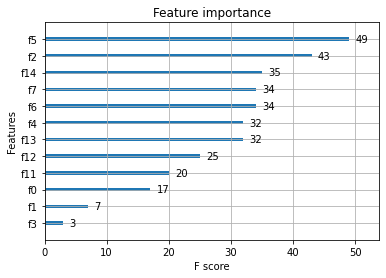

In [34]:
# ваш код
xgb.plot_importance(xgb_model)

По полученным данным можно посмотреть, какие признаки являются излишними и их можно убрать, а какие наиболее важны при обучении модели, т.е. используются чаще всего.

### Несбалансированные выборки

Мы уже упоминали о том, что работа с несбалансированными выборками несколько отличается от работы с идеальными датасетами. В XGBoost есть возможность несколько упростить эту работу: 
- задать большие веса некоторым объектам при инициализации DMatrix
- контролировать соотношение числа объектов разных классов с помощью параметра set_pos_weight

Сгенерируем несбалансированную выборку.

In [35]:
x, y = make_classification(n_samples=1000, n_features=7, n_informative=3, n_redundant=3, 
                           n_classes=2, weights=[.9, .1], random_state=20)

print(f'There are {sum(y)} positive instances')

There are 104 positive instances


### 4.
Разбейте выборку на тренировочную и тестовую, соблюдая стратификацию по *y* и размер тестового датасета 0.3. Создайте объекты DMatrix для тренировочной и тестовой выборок.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# ваш код
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

Зададим параметры для алгоритма и количество итераций.

In [38]:
params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1}

num_rounds = 30

### 5.
С помощью метода train обучите модель. С помощью метода predict получите предсказания для тестовых данных. Так как алгоритм возвращает вероятности, получите бинарную матрицу значений этих вероятностей, элементы которой при полученной вероятности > 0.5 равны True, а при вероятности <= 0.5 равны False. Выведите эту матрицу.

In [39]:
# ваш код
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

In [53]:
y_pred = np.round(xgb_model.predict(dtest)).astype(int)
y_pred.astype(bool)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

### 6.
Выведите матрицу ошибок, точность и полноту для полученных предсказаний.

In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [63]:
# ваш код
print('Матрица ошибок:\n', confusion_matrix(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))


Матрица ошибок:
 [[262   7]
 [ 16  15]]
Точность: 0.6818181818181818
Полнота: 0.4838709677419355


Видно, что полнота гораздо ниже точности, т.е. алгоритм плохо распознает объекты класса, который представлен меньшим количеством экземпляров.

Теперь зададим вручную веса для экземпляров классов.

In [65]:
import numpy as np

weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5

### 7.
Повторите то же, что делали ранее: создайте объекты DMatrix - для тренировочных данных укажите веса, а для тестовых оставьте только сами данные; обучите модель и получите ее предсказания так же, как и в предыдущем случае. Выведите матрицу ошибок, точность и полноту.

In [66]:
# ваш код
dtrain = xgb.DMatrix(x_train, y_train, weights)
dtest = xgb.DMatrix(x_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

In [67]:
y_pred = np.round(xgb_model.predict(dtest)).astype(int)
print('Матрица ошибок:\n', confusion_matrix(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

Матрица ошибок:
 [[254  15]
 [  8  23]]
Точность: 0.6052631578947368
Полнота: 0.7419354838709677


Можем увидеть, что значение полноты увеличилось, но при этом точность уменьшилась. Если нам важны обе метрики, то пригодится параметр scale_pos_weight в XGBoost.

### 8.
Снова создайте объекты DMatrix, как в первом случае (без задания весов).

In [87]:
# ваш код
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

### 9.
Инициализируйте параметр scale_pos_weight как соотношение числа объектов двух классов. Для этого число объектов класса 0 разделите на число объектов класса 1. Добавьте в словарь параметров алгоритма params пару с ключом 'scale_pos_weight' и значением, равным полученному соотношению классов.

In [104]:
# ваш код
number_of_zeros = np.unique(y_train, return_counts=True)[1][0]
number_of_ones = np.unique(y_train, return_counts=True)[1][1]
scale_pos_weight = number_of_zeros / number_of_ones
print(f'Для коэффициента scale_pos_weight получено значение {scale_pos_weight:.3f}')

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1,
         'scale_pos_weight': scale_pos_weight}

num_rounds = 60

Для коэффициента scale_pos_weight получено значение 8.589


### 10.
Обучите модель с параметрами params и получите ее предсказания для тестовой выборки. Выведите матрицу ошибок, точность и полноту.**

In [97]:
# ваш код
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)
y_pred = np.round(xgb_model.predict(dtest)).astype(int)
print('Матрица ошибок:\n', confusion_matrix(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

Матрица ошибок:
 [[250  19]
 [  6  25]]
Точность: 0.5681818181818182
Полнота: 0.8064516129032258


Значение параметра scale_pos_weight надо выбирать в зависимости от желаемого соотношения между точностью и полнотой. Например, если нам нужны примерно одинаковые значения precision и recall, в данном случае следует уменьшить полученное значение параметра в несколько раз.

In [86]:
# Пробую классификатор CatBoost, с параметрами по умолчанию
import catboost as ctb

ctb_model = ctb.CatBoostClassifier().fit(X=x_train, y=y_train, verbose=False)

In [83]:
ctb_pred = ctb_model.predict(x_test)
print('Матрица ошибок:\n', confusion_matrix(y_test, ctb_pred))
print('Точность:', precision_score(y_test, ctb_pred))
print('Полнота:', recall_score(y_test, ctb_pred))

Матрица ошибок:
 [[264   5]
 [  9  22]]
Точность: 0.8148148148148148
Полнота: 0.7096774193548387


Как можно видеть, при параметрах по умолчанию, алгоритм CatBoost дал ощутимо более точные предсказания, чем xgboost после ручной настройки